In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from score_analysis import showbias
from score_analysis.showbias_plotting import (
    plot_multiple_thresholds,
    plot_single_threshold,
)

rng = np.random.default_rng()

## Create some toy data

In its simplest case, the showbias function assumes that you have a pandas dataframe with three columns:
- a `group` column that indicates group membership for every row, e.g. female and male values in a column called gender
- a `scores` column that contains the predicted scores (e.g. by a model) for
- a `labels` column that contains the ground truth using integers

Below we create a synthetic dataset that contains dogfido<b><sup>TM</sup></b> IDV data for different dog breeds

In [2]:
dog_breeds = ["German Shepherd", "Golden Retriever", "Bulldog", "Beagle"]
genders = ["male", "female"]
n = 1_000

df = pd.DataFrame(
    {
        "breed": rng.choice(dog_breeds, size=n),
        "gender": rng.choice(genders, size=n),
        "labels": rng.choice([0, 1], size=n),
        "scores": rng.uniform(0.0, 1.0, size=n),
    }
)

In [3]:
df.head()

,breed,gender,labels,scores
0,Beagle,female,0,0.367686
1,Bulldog,male,0,0.012817
2,Bulldog,male,0,0.630195
3,German Shepherd,male,0,0.308263
4,Bulldog,male,0,0.619626


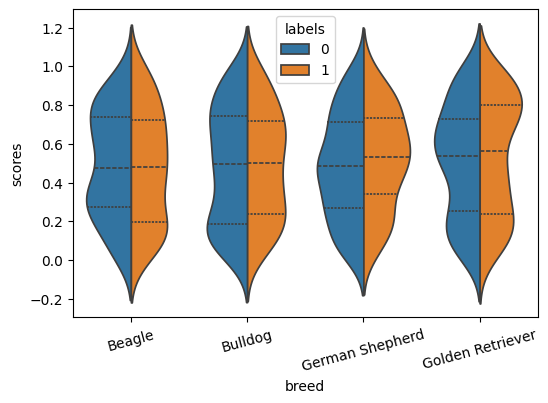

In [4]:
plt.figure(figsize=(6, 4))
sns.violinplot(data=df, x="breed", y="scores", hue="labels", split=True, inner="quart")
plt.xticks(rotation=15)
plt.show()

## Showbias vanilla version

In [5]:
bias_frame = showbias(
    data=df,
    group_columns=["breed", "gender"],
    label_column="labels",
    score_column="scores",
    metric="fnr",
    threshold=[0.5],
)

In [6]:
bias_frame.values

0.5
breed            gender          
Beagle           female  0.571429
                 male    0.515152
Bulldog          female  0.545455
                 male    0.442623
German Shepherd  female  0.368421
                 male    0.491228
Golden Retriever female  0.521739
                 male    0.415385

## Passing several thresholds at once

In [7]:
bias_frame = showbias(
    data=df,
    group_columns=["breed", "gender"],
    label_column="labels",
    score_column="scores",
    metric="fnr",
    threshold=[0.3, 0.5, 0.7],
)
bias_frame.values

0.3       0.5       0.7
breed            gender                              
Beagle           female  0.396825  0.571429  0.761905
                 male    0.272727  0.515152  0.666667
Bulldog          female  0.333333  0.545455  0.787879
                 male    0.327869  0.442623  0.688525
German Shepherd  female  0.157895  0.368421  0.736842
                 male    0.280702  0.491228  0.701754
Golden Retriever female  0.304348  0.521739  0.623188
                 male    0.276923  0.415385  0.569231

## Normalising metric

You can obtain metrics that are normalised to the metric measured across the entire dataset by passing the `normalize` argument, like so:

In [8]:
bias_frame = showbias(
    data=df,
    group_columns=["breed", "gender"],
    label_column="labels",
    score_column="scores",
    metric="fnr",
    threshold=[0.5],
    normalize="by_overall",
)
bias_frame.values

0.5
breed            gender          
Beagle           female  1.164466
                 male    1.049784
Bulldog          female  1.111536
                 male    0.901984
German Shepherd  female  0.750774
                 male    1.001032
Golden Retriever female  1.063208
                 male    0.846477

## What is a BiasFrame?

In [9]:
type(bias_frame)

score_analysis.showbias.BiasFrame

In [10]:
print(bias_frame)

BiasFrame(values=                              0.5
breed            gender          
Beagle           female  1.164466
                 male    1.049784
Bulldog          female  1.111536
                 male    0.901984
German Shepherd  female  0.750774
                 male    1.001032
Golden Retriever female  1.063208
                 male    0.846477, alpha=None, lower=None, upper=None)


In [11]:
type(bias_frame.values)

pandas.core.frame.DataFrame

## Confidence intervals

You can obtain confidence intervals by setting the `bootstrap_ci` to `True`:

In [12]:
bias_frame = showbias(
    data=df,
    group_columns=["breed", "gender"],
    label_column="labels",
    score_column="scores",
    metric="fnr",
    threshold=[0.5],
    bootstrap_ci=True,
)

In [13]:
bias_frame.values

0.5
breed            gender          
Beagle           female  0.571429
                 male    0.515152
Bulldog          female  0.545455
                 male    0.442623
German Shepherd  female  0.368421
                 male    0.491228
Golden Retriever female  0.521739
                 male    0.415385

In [14]:
bias_frame.lower

0.5
breed            gender          
Beagle           female  0.446048
                 male    0.398789
Bulldog          female  0.427119
                 male    0.312518
German Shepherd  female  0.219512
                 male    0.356224
Golden Retriever female  0.399575
                 male    0.299130

In [15]:
bias_frame.upper

0.5
breed            gender          
Beagle           female  0.695652
                 male    0.648234
Bulldog          female  0.666667
                 male    0.566493
German Shepherd  female  0.526316
                 male    0.615632
Golden Retriever female  0.651317
                 male    0.547138

In [16]:
print(bias_frame.to_markdown())

|                                | 0.5             |
|:-------------------------------|:----------------|
| ('Beagle', 'female')           | 0.571           |
|                                | (0.446 - 0.696) |
| ('Beagle', 'male')             | 0.515           |
|                                | (0.399 - 0.648) |
| ('Bulldog', 'female')          | 0.545           |
|                                | (0.427 - 0.667) |
| ('Bulldog', 'male')            | 0.443           |
|                                | (0.313 - 0.566) |
| ('German Shepherd', 'female')  | 0.368           |
|                                | (0.22 - 0.526)  |
| ('German Shepherd', 'male')    | 0.491           |
|                                | (0.356 - 0.616) |
| ('Golden Retriever', 'female') | 0.522           |
|                                | (0.4 - 0.651)   |
| ('Golden Retriever', 'male')   | 0.415           |
|                                | (0.299 - 0.547) |


## BiasFrame methods

### to_markdown()

In [17]:
bias_frame_md = bias_frame.to_markdown(
    reset_display_index=True, number_decimal_points=5
)
print(bias_frame_md)

| breed            | gender   | 0.5                 |
|:-----------------|:---------|:--------------------|
| Beagle           | female   | 0.57143             |
|                  |          | (0.44605 - 0.69565) |
| Beagle           | male     | 0.51515             |
|                  |          | (0.39879 - 0.64823) |
| Bulldog          | female   | 0.54545             |
|                  |          | (0.42712 - 0.66667) |
| Bulldog          | male     | 0.44262             |
|                  |          | (0.31252 - 0.56649) |
| German Shepherd  | female   | 0.36842             |
|                  |          | (0.21951 - 0.52632) |
| German Shepherd  | male     | 0.49123             |
|                  |          | (0.35622 - 0.61563) |
| Golden Retriever | female   | 0.52174             |
|                  |          | (0.39957 - 0.65132) |
| Golden Retriever | male     | 0.41538             |
|                  |          | (0.29913 - 0.54714) |


## Plotting functionality

### plot_single_threshold

In [18]:
dog_breeds = ["German Shepherd", "Golden Retriever", "Bulldog", "Beagle"]
n = 1_000

df = pd.DataFrame(
    {
        "breed": rng.choice(dog_breeds, size=n),
        "labels": rng.choice([0, 1], size=n),
        "scores": rng.uniform(0.0, 1.0, size=n),
    }
)

bias_frame = showbias(
    data=df,
    group_columns="breed",
    label_column="labels",
    score_column="scores",
    metric="fnr",
    threshold=[0.5],
    bootstrap_ci=True,
)

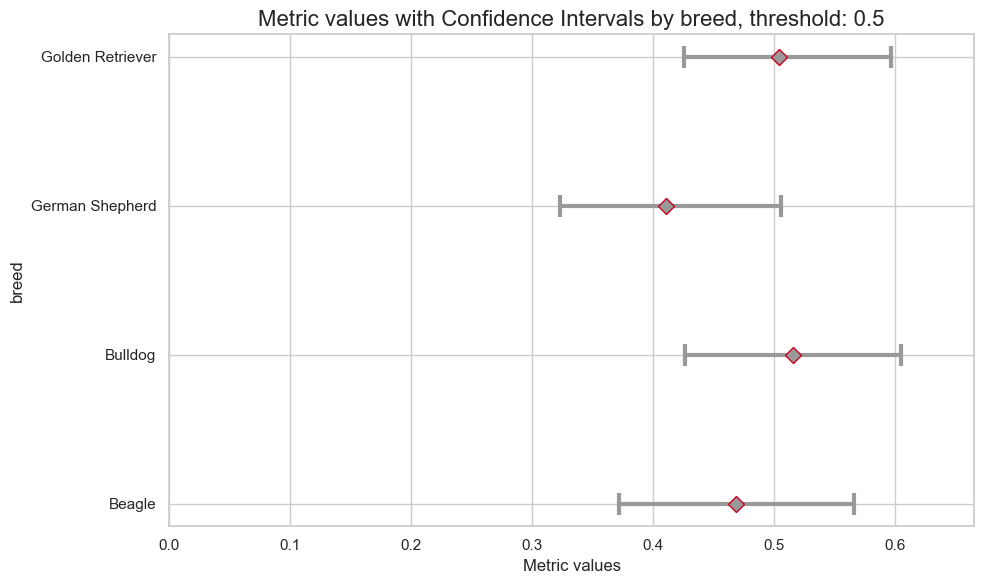

In [19]:
plot = plot_single_threshold(bias_frame, threshold=0.5)
plot.show()

### plot_multiple_thresholds

In [20]:
bias_frame = showbias(
    data=df,
    group_columns="breed",
    label_column="labels",
    score_column="scores",
    metric="fnr",
    threshold=np.linspace(0.0, 1.0, 1000),
)

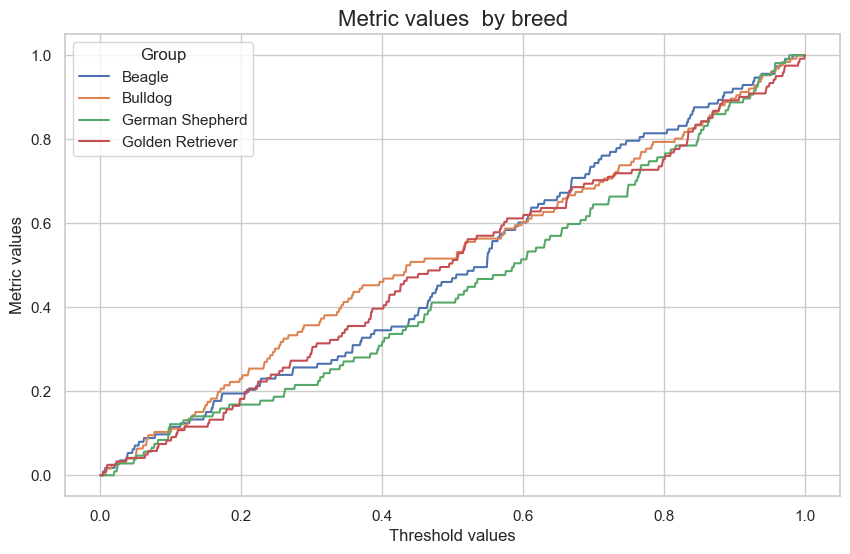

In [21]:
plot = plot_multiple_thresholds(bias_frame)
plt.show()

## Available metrics

`showbias` supports all metrics that are supported by `score-analysis`.
Currently, you can pass any of the strings below to the metric argument in showbias:

Basic parameters:
- "tp" (true positive)
- "tn" (true negative)
- "fp" (false positive)
- "fn" (false negative)
- "p" (condition positive)
- "n" (condition negative)
- "top" (test outcome positive)
- "ton" (test outcome negative)
- "pop" (population counts)

Class metrics
- "tpr" (true positive rate)
- "tnr" (true negative rate)
- "fpr" (false positive rate)
- "fnr" (false negative rate)
- "topr" (test outcome positive rate)
- "tonr" (test outcome negative rate)
- "ppv" (positive predictive value)
- "npv" (negative predictive value)
- "fdr" (false discovery rate)
- "for_" (false omission rate)
- "class_accuracy" (class accuracy)
- "class_error_rate" (class_error_rate)

Overall metrics
- "accuracy" (Accuracy)
- "error_rate" (Error rate)